In [2]:
import torch
import numpy as np
np.set_printoptions(precision=3)
a = [1,2,3]
b = np.array([4,5,6],dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
# print(t_a)
# print(t_b)

t_ones = torch.ones(2,3)
t_ones.shape

torch.Size([2, 3])

In [3]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


Generating random numbers

In [4]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.4802, 0.7463, 0.5174],
        [0.6978, 0.1453, 0.5408]])


### **Manipulating the data type and shape of a tensor**

In [5]:
## change the datatype
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [6]:
t = torch.rand(3,5)
t_tr = torch.transpose(t,0,1)
print(t.shape,' --->',t_tr.shape)

torch.Size([3, 5])  ---> torch.Size([5, 3])


In [7]:
t = torch.zeros(30)
print(t)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])


In [8]:
t_reshape = t.reshape(5,6)
print(t_reshape.shape)

torch.Size([5, 6])


In [9]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t,2)
print(t.shape,'--->',t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) ---> torch.Size([1, 2, 4, 1])


In [10]:
torch.manual_seed(123)
t1 = 2*torch.rand(5,2) -1
t2 = torch.normal(mean=0,std=1,size=(5,2))

In [11]:
t3 = torch.multiply(t1,t2)
print(t3)

tensor([[ 0.5505, -0.0062],
        [ 1.1866, -0.1795],
        [-1.4998,  0.4800],
        [-0.3991, -0.2919],
        [-0.0770,  0.2928]])


In [12]:
t4 = torch.mean(t1,axis=0)
print(t4)

tensor([-0.6230,  0.1602])


In [13]:
t5 = torch.matmul(t1,torch.transpose(t2,0,1))
print(t5)

tensor([[ 0.5443,  0.9584, -0.6961, -0.2117, -0.0283],
        [ 0.5996,  1.0071, -0.6273, -0.1342,  0.1833],
        [ 1.0125,  1.6867, -1.0199, -0.1987,  0.3701],
        [ 1.1309,  2.1149, -1.8000, -0.6909, -0.6027],
        [ 0.7679,  1.2941, -0.8158, -0.1807,  0.2158]])


In [14]:
norm_t1 = torch.linalg.norm(t1,ord=2,dim=1)
print(norm_t1)

tensor([0.4091, 0.6236, 1.1240, 1.0772, 0.7774])


###### **Split, stack, and concatenate tensors**

In [15]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [16]:
t_splits = torch.chunk(t,3)
[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [17]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [18]:
t_splits = torch.split(t,split_size_or_sections=[3,2])
[item.numpy() for item in t_splits]

[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [19]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A,B],axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [20]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A,B],axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## **Building input pipelines in PyTorch**

In [21]:
from torch.utils.data import DataLoader
t = torch.arange(6,dtype=torch.float32)
data_loader = DataLoader(t)

In [22]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [23]:
data_loader = DataLoader(t,batch_size=3,drop_last=False)
for i,batch in enumerate(data_loader,1):
    print(f'batch {i}:',batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


**Combining two tensors into a joint dataset**

In [24]:
torch.manual_seed(1)
t_x = torch.rand([4,3],dtype=torch.float32)
t_y = torch.arange(4)

In [25]:
t_x

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])

In [26]:
t_y

tensor([0, 1, 2, 3])

In [27]:
from torch.utils.data import Dataset

class JoinDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [28]:
joint_dataset = JoinDataset(t_x,t_y)

In [29]:
for example in joint_dataset:
    print(' x:',example[0],' y:',example[1])

 x: tensor([0.7576, 0.2793, 0.4031])  y: tensor(0)
 x: tensor([0.7347, 0.0293, 0.7999])  y: tensor(1)
 x: tensor([0.3971, 0.7544, 0.5695])  y: tensor(2)
 x: tensor([0.4388, 0.6387, 0.5247])  y: tensor(3)


**Shuffle batch and repeat**

In [30]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset,batch_size=2,shuffle=True)

In [31]:
for i,batch in enumerate(data_loader,1):
    print(f'batch {i}:','x:',batch[0],'\n  y:',batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
  y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
  y: tensor([1, 3])


In [32]:
for epoch in range(2):
    print(f'epoch {epoch}')
    for i, batch in enumerate(data_loader,1):
        print(f'batch {i}:','x:',batch[0],
             '\n  y:',batch[1])

epoch 0
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
  y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
  y: tensor([1, 3])
epoch 1
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
  y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
  y: tensor([0, 1])


In [33]:
import pathlib
imgdir_path = pathlib.Path('cat_dogs_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dogs_images/cat-01.jpg', 'cat_dogs_images/cat-02.jpg', 'cat_dogs_images/cat-03.jpg', 'cat_dogs_images/dog-01.jpg', 'cat_dogs_images/dog-02.jpg', 'cat_dogs_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


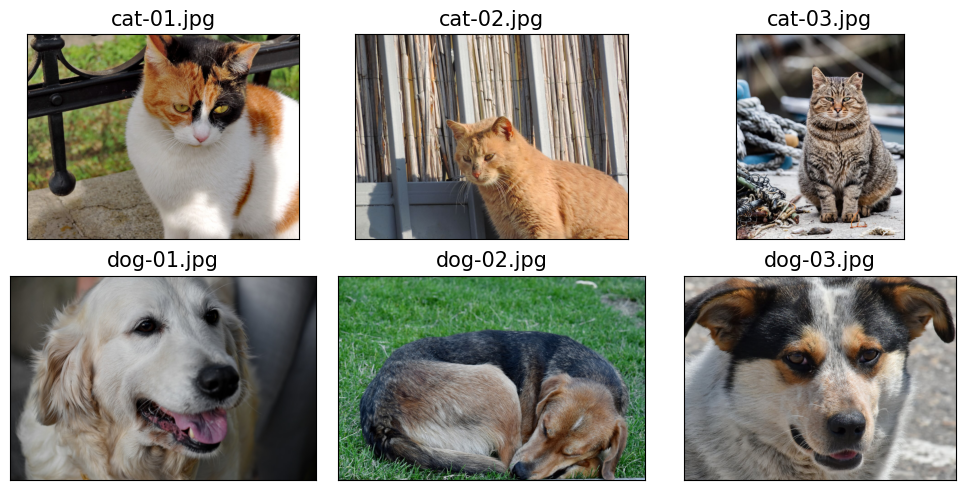

In [34]:
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10,5))

for i,file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ',np.array(img).shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file),size=15)
plt.tight_layout()
plt.show()

In [35]:
labels = [1 if 'dog' in os.path.basename(file) else
          0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [36]:
class ImageDataset(Dataset):
    def __init__(self,file_list,labels):
        self.file_list = file_list
        self.labels = labels
        
    def __getitem__(self,index):
        file = self.file_list[index]
        label = self.labels[index]
        return file,label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list,labels)
for file,label in image_dataset:
    print(file,label)

cat_dogs_images/cat-01.jpg 0
cat_dogs_images/cat-02.jpg 0
cat_dogs_images/cat-03.jpg 0
cat_dogs_images/dog-01.jpg 1
cat_dogs_images/dog-02.jpg 1
cat_dogs_images/dog-03.jpg 1


In [37]:
import torchvision.transforms as transforms
img_height,img_width = 80,120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height,img_width))
])

In [38]:
class ImageDataset(Dataset):
    
    def __init__(self,file_list,labels,transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self,index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img,label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list,labels,transform)

/home/lucifer/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


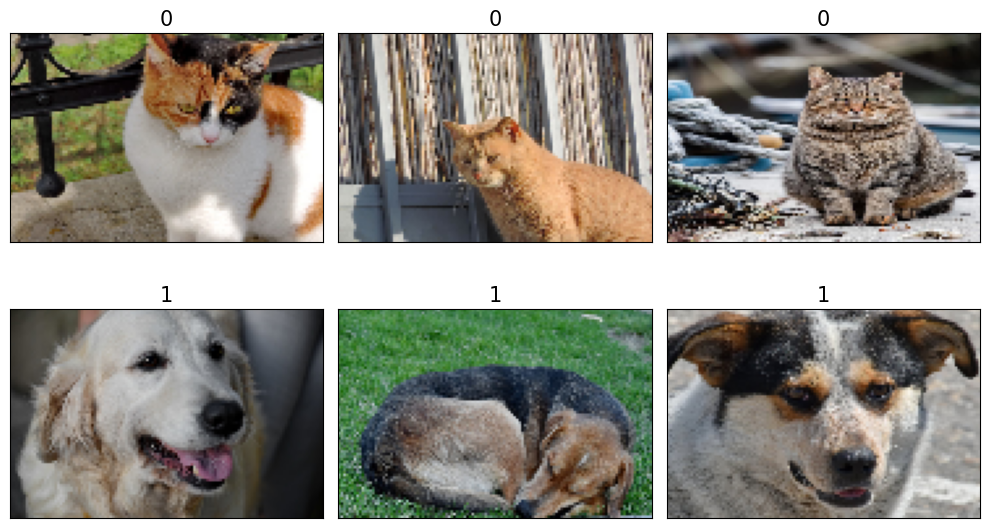

In [39]:
fig = plt.figure(figsize=(10,6))
for i,example in enumerate(image_dataset):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1,2,0)))
    ax.set_title(f'{example [1]}',size = 15)
plt.tight_layout()
plt.show()

In [40]:
# import torchvision
# image_path = './'
# celeba_dataset = torchvision.datasets.CelebA(image_path,
#                                             split='train',target_type='attr',
#                                             download=False)

### **Pytorch neural network module**

In [41]:
import matplotlib.pyplot as plt

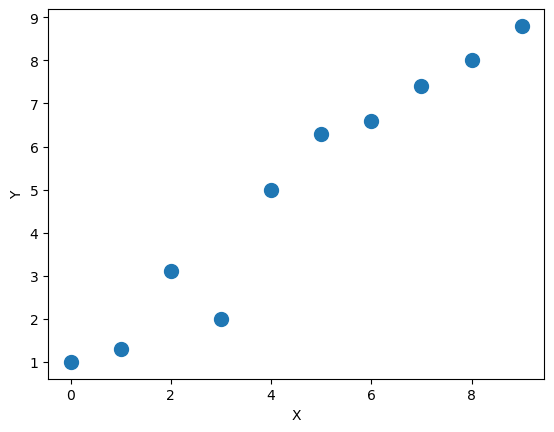

In [42]:
X_train = np.arange(10,dtype='float32').reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,8.8],dtype='float32')
plt.plot(X_train,y_train,'o',markersize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [43]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm,y_train)
batch_size =1
train_d1 = DataLoader(train_ds,batch_size,shuffle=True)

In [44]:
torch.manual_seed(1)
weight = torch.randn(1,requires_grad=True)
# weight.requires_grad(1)
bias = torch.zeros(1,requires_grad=True)

def model(xb):
    return xb @ weight + bias

def loss_fn(input,target):
    return (input-target).pow(2).mean()

In [45]:
learning_rate = 0.001
num_epochs =200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch,y_batch in train_d1:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch% log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 46.5720
Epoch 10 Loss 27.1988
Epoch 20 Loss 1.6291
Epoch 30 Loss 14.6589
Epoch 40 Loss 10.6987
Epoch 50 Loss 6.5654
Epoch 60 Loss 0.6017
Epoch 70 Loss 2.6532
Epoch 80 Loss 2.0432
Epoch 90 Loss 0.2841
Epoch 100 Loss 0.5375
Epoch 110 Loss 1.0285
Epoch 120 Loss 0.0285
Epoch 130 Loss 0.5042
Epoch 140 Loss 0.0189
Epoch 150 Loss 1.8618
Epoch 160 Loss 0.0067
Epoch 170 Loss 0.1138
Epoch 180 Loss 0.0887
Epoch 190 Loss 0.0280


In [46]:
print('Final Parameters:',weight.item(),bias.item())

Final Parameters: 2.6401469707489014 4.86293888092041


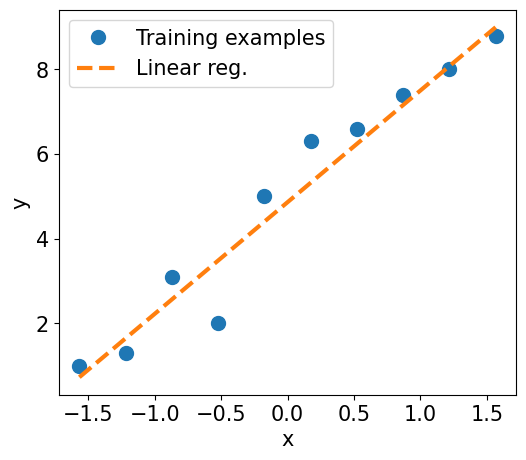

In [47]:
X_test = np.linspace(0,9,num=100,dtype='float32').reshape(-1,1)
X_test_norm = (X_test-np.mean(X_train))/np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm,y_train,'o',markersize=10)
plt.plot(X_test_norm,y_pred,'--',lw=3)
plt.legend(['Training examples','Linear reg.'],fontsize=15)
ax.set_xlabel('x',size=15)
ax.set_ylabel('y',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

### **Model training via the torch.nn and torch.optim modules**

In [48]:
import torch.nn as nn
loss_fn = nn.MSELoss(reduction='mean')
input_size =1
output_size = 1
model = nn.Linear(input_size,output_size)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [49]:
for epoch in range(num_epochs):
    for x_batch,y_batch in train_d1:
        
        pred = model(x_batch)[:,0]
        loss = loss_fn(pred,y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6712
Epoch 10 Loss 29.1921
Epoch 20 Loss 21.0009
Epoch 30 Loss 0.1163
Epoch 40 Loss 12.6809
Epoch 50 Loss 1.7720
Epoch 60 Loss 6.8238
Epoch 70 Loss 2.5962
Epoch 80 Loss 0.0195
Epoch 90 Loss 0.7442
Epoch 100 Loss 0.9371
Epoch 110 Loss 0.5684
Epoch 120 Loss 0.0677
Epoch 130 Loss 0.0893
Epoch 140 Loss 0.0996
Epoch 150 Loss 0.1084
Epoch 160 Loss 0.1160
Epoch 170 Loss 0.1224
Epoch 180 Loss 0.0007
Epoch 190 Loss 0.0613


In [50]:
print('FInal parameters:',model.weight.item(),model.bias.item())

FInal parameters: 2.6188268661499023 4.857386112213135


**MLP for classifying flowers**

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris['data'].shape

(150, 4)

In [52]:
X = iris['data']
y = iris['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1)

In [53]:
X_train_norm = (X_train-np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm,y_train)
torch.manual_seed(1)
batch_size = 2
train_d1 = DataLoader(train_ds,batch_size,shuffle=True)

In [54]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size,hidden_size)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [55]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size,hidden_size,output_size)

In [56]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [57]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch,y_batch in train_d1:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred,dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_d1.dataset)
    accuracy_hist[epoch] /= len(train_d1.dataset)

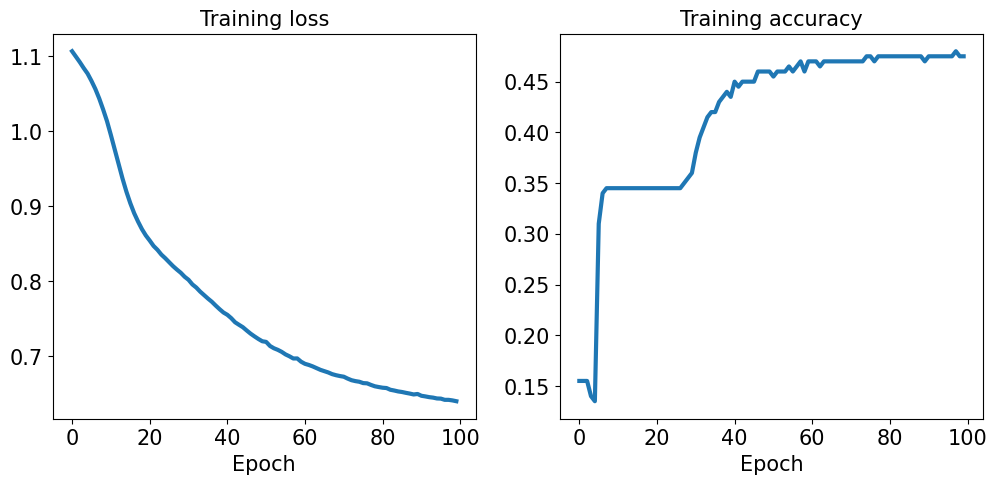

In [58]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist,lw=3)
ax.set_title('Training loss',size=15)
ax.set_xlabel('Epoch',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist,lw=3)
ax.set_title('Training accuracy',size=15)
ax.set_xlabel('Epoch',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

In [59]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test,dim=1)==y_test).float()
correct

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
accuracy= correct.mean()
print(f'Test Acc: {accuracy:.4f}')

Test Acc: 0.9800


In [64]:
path= 'iris_classifier.pt'
torch.save(model,path)

In [65]:
model_new = torch.load(path)

In [66]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [67]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test,dim=1)==y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [68]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(),path)

In [69]:
model_new = Model(input_size,hidden_size,output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>

In [70]:
X = np.array([1,1.4,2.5])
w = np.array([0.4,0.3,0.5])
def net_input(X,w):
    return np.dot(X,w)
def logistic(z):
    return 1.0 / (1.0+np.exp(-z))
def logistic_activation(X,w):
    z = net_input(X,w)
    return logistic(z)
print(f'p(y=1|x) = {logistic_activation(X,w):.3f}')

p(y=1|x) = 0.888


In [71]:
W = np.array([[1.1,1.2,0.8,0.4],
             [0.2,0.4,1.0,0.2],
             [0.6,1.5,1.2,0.7]])
A = np.array([[1,0.1,0.4,0.6]])
Z = np.dot(W,A[0])
y_probas = logistic(Z)
print('Net Input: \n',Z)
print('Net Output: \n',y_probas)

Net Input: 
 [1.78 0.76 1.65]
Net Output: 
 [0.856 0.681 0.839]


In [74]:
y_class = np.argmax(Z,axis=0)
y_class

0

In [75]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))
y_probas = softmax(Z)
print('Probabilities:\n',y_probas)

Probabilities:
 [0.447 0.161 0.392]


In [76]:
np.sum(y_probas)

1.0

In [77]:
torch.softmax(torch.from_numpy(Z),dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

In [83]:
z = np.arange(-5,5,0.05)

In [84]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500,
        0.4000, 0.4500, 0.5000, 0.5500, 